In [ ]:
#!pip install ntscraper

In [ ]:
#from ntscraper import Nitter

#scraper = Nitter(log_level=1)

In [ ]:
#scraped_tweet = scraper.get_tweets("UltraMilkXStrayKids", mode='hashtag', number=100)

In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/DATA_UM

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/DATA_UM


In [ ]:
#save data to json

import json

#with open('result.json', 'w') as fp:
    #json.dump(scraped_tweet, fp)

In [ ]:
# Load Json Data

with open('TheUnstoppableGeneration.json') as json_file:
    data = json.load(json_file)

tweet_data = data['tweets']

In [ ]:
print(tweet_data[1]['stats'])

{'comments': 330, 'retweets': 2876, 'quotes': 1073, 'likes': 13687}


In [ ]:
import csv

#to csv
data_file = open('TheUnstoppableGeneration.csv', 'w')

# create the csv writer object
csv_writer = csv.writer(data_file)

# Counter variable used for writing
# headers to the CSV file
count = 0

for tweet in tweet_data:
    if count == 0:

        # Writing headers of CSV file
        header = tweet.keys()
        csv_writer.writerow(header)
        count += 1

    # Writing data of CSV file
    csv_writer.writerow(tweet.values())

data_file.close()

In [ ]:
import pandas as pd

dframe = pd.read_csv('TheUnstoppableGeneration.csv')

print(dframe.text)

0      Annyeonghaseyo!  Ultra Milk Proudly Presents @...
1      Taraaaaa~ Ultra Milk dan @ITZYofficial mengaja...
2      Annyeonghaseyo, Movers! Mana suaranyaaa yang k...
3      AUGUST - MANY REASONS TO CELEBRATE!  #TheUnsto...
4      The secret to multiplication in life is Thanks...
                             ...                        
108    Wihh keren! Terima kasih kembali, Movers 😎 #Do...
109    #UltraMilk #LoveLifeLoveMilk #ITZY #DontStopYo...
110    Hai Ultra people! Ultra Milk dan @ITZYofficial...
111    Ryujini  #UltraMilk #LoveLifeLoveMilk #ITZY #D...
112    Sekarang kalau minum @ultramym bawannya mau go...
Name: text, Length: 113, dtype: object


# **SECTION FOR DATA CLEANING**

In [ ]:
import re

In [ ]:
df_clean = dframe[['text']]

####1. Penghapusan Punctuations, Angka, Link Website, dan Hashtag

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Before Remove Punctuation
#dframe.head(10)
df_clean.head(10)

,text
0,Annyeonghaseyo! Ultra Milk Proudly Presents @...
1,Taraaaaa~ Ultra Milk dan @ITZYofficial mengaja...
2,"Annyeonghaseyo, Movers! Mana suaranyaaa yang k..."
3,AUGUST - MANY REASONS TO CELEBRATE! #TheUnsto...
4,The secret to multiplication in life is Thanks...
5,#TheUnstoppableGeneration
6,"Btw, bakalan ada keseruan dari Ultra Milk lagi..."
7,TRANS #HappyCHAERYEONGDay! 22nd Saengil Chukah...
8,#HappyCHAERYEONGDay! Saengil Chukahamnida ke-2...
9,👑 Happy Birthday #YEJI uri best leader 👑 Be he...


In [ ]:
def remove_punct(text):
    # Remove hashtag dan @
    ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    # Remove punctiation
    text  = "".join([char for char in text if char not in string.punctuation])
    # Remove angka
    text = re.sub('[0-9]+', '', text)
    # Remove website link
    text = re.sub(r'http\S+', '', text)

    return text

df_clean['text_punt'] = df_clean['text'].apply(lambda x: remove_punct(x))
df_clean.head(10)

<ipython-input-82-22b4ddc9b774>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['text_punt'] = df_clean['text'].apply(lambda x: remove_punct(x))


,text,text_punt
0,Annyeonghaseyo! Ultra Milk Proudly Presents @...,Annyeonghaseyo Ultra Milk Proudly Presents IT...
1,Taraaaaa~ Ultra Milk dan @ITZYofficial mengaja...,Taraaaaa Ultra Milk dan ITZYofficial mengajak ...
2,"Annyeonghaseyo, Movers! Mana suaranyaaa yang k...",Annyeonghaseyo Movers Mana suaranyaaa yang kem...
3,AUGUST - MANY REASONS TO CELEBRATE! #TheUnsto...,AUGUST MANY REASONS TO CELEBRATE TheUnstoppa...
4,The secret to multiplication in life is Thanks...,The secret to multiplication in life is Thanks...
5,#TheUnstoppableGeneration,TheUnstoppableGeneration
6,"Btw, bakalan ada keseruan dari Ultra Milk lagi...",Btw bakalan ada keseruan dari Ultra Milk lagi ...
7,TRANS #HappyCHAERYEONGDay! 22nd Saengil Chukah...,TRANS HappyCHAERYEONGDay nd Saengil Chukahamni...
8,#HappyCHAERYEONGDay! Saengil Chukahamnida ke-2...,HappyCHAERYEONGDay Saengil Chukahamnida ke bua...
9,👑 Happy Birthday #YEJI uri best leader 👑 Be he...,👑 Happy Birthday YEJI uri best leader 👑 Be hea...


#### 2. Remove Stopwords

In [ ]:
!pip install Sastrawi

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [ ]:
# Indonesian Stopword by Sastrawi
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

In [ ]:
def remove_stopwords(text):
    text = stopword.remove(text)
    return text

df_clean['text_stop'] = df_clean['text_punt'].apply(lambda x: remove_stopwords(x))
df_clean.head(10)

<ipython-input-86-ee2729099c0e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['text_stop'] = df_clean['text_punt'].apply(lambda x: remove_stopwords(x))


,text,text_punt,text_stop
0,Annyeonghaseyo! Ultra Milk Proudly Presents @...,Annyeonghaseyo Ultra Milk Proudly Presents IT...,Annyeonghaseyo Ultra Milk Proudly Presents IT...
1,Taraaaaa~ Ultra Milk dan @ITZYofficial mengaja...,Taraaaaa Ultra Milk dan ITZYofficial mengajak ...,Taraaaaa Ultra Milk ITZYofficial mengajak kamu...
2,"Annyeonghaseyo, Movers! Mana suaranyaaa yang k...",Annyeonghaseyo Movers Mana suaranyaaa yang kem...,Annyeonghaseyo Movers Mana suaranyaaa kemarin ...
3,AUGUST - MANY REASONS TO CELEBRATE! #TheUnsto...,AUGUST MANY REASONS TO CELEBRATE TheUnstoppa...,AUGUST MANY REASONS TO CELEBRATE TheUnstoppa...
4,The secret to multiplication in life is Thanks...,The secret to multiplication in life is Thanks...,The secret to multiplication in life is Thanks...
5,#TheUnstoppableGeneration,TheUnstoppableGeneration,TheUnstoppableGeneration
6,"Btw, bakalan ada keseruan dari Ultra Milk lagi...",Btw bakalan ada keseruan dari Ultra Milk lagi ...,Btw bakalan keseruan Ultra Milk di bulan lohhh...
7,TRANS #HappyCHAERYEONGDay! 22nd Saengil Chukah...,TRANS HappyCHAERYEONGDay nd Saengil Chukahamni...,TRANS HappyCHAERYEONGDay nd Saengil Chukahamni...
8,#HappyCHAERYEONGDay! Saengil Chukahamnida ke-2...,HappyCHAERYEONGDay Saengil Chukahamnida ke bua...,HappyCHAERYEONGDay Saengil Chukahamnida buat m...
9,👑 Happy Birthday #YEJI uri best leader 👑 Be he...,👑 Happy Birthday YEJI uri best leader 👑 Be hea...,👑 Happy Birthday YEJI uri best leader 👑 Be hea...


####3. Stemming Sentence

In [ ]:
# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
def stemming_sentence(text):
    text = stemmer.stem(text)
    return text

df_clean['text_stemming'] = df_clean['text_stop'].apply(lambda x: stemming_sentence(x))
df_clean.head(10)

<ipython-input-89-8a3e9041785f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['text_stemming'] = df_clean['text_stop'].apply(lambda x: stemming_sentence(x))


,text,text_punt,text_stop,text_stemming
0,Annyeonghaseyo! Ultra Milk Proudly Presents @...,Annyeonghaseyo Ultra Milk Proudly Presents IT...,Annyeonghaseyo Ultra Milk Proudly Presents IT...,annyeonghaseyo ultra milk proudly presents itz...
1,Taraaaaa~ Ultra Milk dan @ITZYofficial mengaja...,Taraaaaa Ultra Milk dan ITZYofficial mengajak ...,Taraaaaa Ultra Milk ITZYofficial mengajak kamu...,taraaaaa ultra milk itzyofficial ajak kamu bua...
2,"Annyeonghaseyo, Movers! Mana suaranyaaa yang k...",Annyeonghaseyo Movers Mana suaranyaaa yang kem...,Annyeonghaseyo Movers Mana suaranyaaa kemarin ...,annyeonghaseyo movers mana suaranyaaa kemarin ...
3,AUGUST - MANY REASONS TO CELEBRATE! #TheUnsto...,AUGUST MANY REASONS TO CELEBRATE TheUnstoppa...,AUGUST MANY REASONS TO CELEBRATE TheUnstoppa...,august many reasons to celebrate theunstoppabl...
4,The secret to multiplication in life is Thanks...,The secret to multiplication in life is Thanks...,The secret to multiplication in life is Thanks...,the secret to multiplication in life is thanks...
5,#TheUnstoppableGeneration,TheUnstoppableGeneration,TheUnstoppableGeneration,theunstoppablegeneration
6,"Btw, bakalan ada keseruan dari Ultra Milk lagi...",Btw bakalan ada keseruan dari Ultra Milk lagi ...,Btw bakalan keseruan Ultra Milk di bulan lohhh...,btw bakal seru ultra milk di bulan lohhh rtin ...
7,TRANS #HappyCHAERYEONGDay! 22nd Saengil Chukah...,TRANS HappyCHAERYEONGDay nd Saengil Chukahamni...,TRANS HappyCHAERYEONGDay nd Saengil Chukahamni...,trans happychaeryeongday nd saengil chukahamni...
8,#HappyCHAERYEONGDay! Saengil Chukahamnida ke-2...,HappyCHAERYEONGDay Saengil Chukahamnida ke bua...,HappyCHAERYEONGDay Saengil Chukahamnida buat m...,happychaeryeongday saengil chukahamnida buat m...
9,👑 Happy Birthday #YEJI uri best leader 👑 Be he...,👑 Happy Birthday YEJI uri best leader 👑 Be hea...,👑 Happy Birthday YEJI uri best leader 👑 Be hea...,happy birthday yeji uri best leader be healthy...


####4. Tokenization

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
def tokenization(text):
    word_token = word_tokenize(text)
    return word_token

df_clean['text_token'] = df_clean['text_stemming'].apply(lambda x: tokenization(x.lower()))
df_clean.head(10)

<ipython-input-93-f2ae7788cbeb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['text_token'] = df_clean['text_stemming'].apply(lambda x: tokenization(x.lower()))


,text,text_punt,text_stop,text_stemming,text_token
0,Annyeonghaseyo! Ultra Milk Proudly Presents @...,Annyeonghaseyo Ultra Milk Proudly Presents IT...,Annyeonghaseyo Ultra Milk Proudly Presents IT...,annyeonghaseyo ultra milk proudly presents itz...,"[annyeonghaseyo, ultra, milk, proudly, present..."
1,Taraaaaa~ Ultra Milk dan @ITZYofficial mengaja...,Taraaaaa Ultra Milk dan ITZYofficial mengajak ...,Taraaaaa Ultra Milk ITZYofficial mengajak kamu...,taraaaaa ultra milk itzyofficial ajak kamu bua...,"[taraaaaa, ultra, milk, itzyofficial, ajak, ka..."
2,"Annyeonghaseyo, Movers! Mana suaranyaaa yang k...",Annyeonghaseyo Movers Mana suaranyaaa yang kem...,Annyeonghaseyo Movers Mana suaranyaaa kemarin ...,annyeonghaseyo movers mana suaranyaaa kemarin ...,"[annyeonghaseyo, movers, mana, suaranyaaa, kem..."
3,AUGUST - MANY REASONS TO CELEBRATE! #TheUnsto...,AUGUST MANY REASONS TO CELEBRATE TheUnstoppa...,AUGUST MANY REASONS TO CELEBRATE TheUnstoppa...,august many reasons to celebrate theunstoppabl...,"[august, many, reasons, to, celebrate, theunst..."
4,The secret to multiplication in life is Thanks...,The secret to multiplication in life is Thanks...,The secret to multiplication in life is Thanks...,the secret to multiplication in life is thanks...,"[the, secret, to, multiplication, in, life, is..."
5,#TheUnstoppableGeneration,TheUnstoppableGeneration,TheUnstoppableGeneration,theunstoppablegeneration,[theunstoppablegeneration]
6,"Btw, bakalan ada keseruan dari Ultra Milk lagi...",Btw bakalan ada keseruan dari Ultra Milk lagi ...,Btw bakalan keseruan Ultra Milk di bulan lohhh...,btw bakal seru ultra milk di bulan lohhh rtin ...,"[btw, bakal, seru, ultra, milk, di, bulan, loh..."
7,TRANS #HappyCHAERYEONGDay! 22nd Saengil Chukah...,TRANS HappyCHAERYEONGDay nd Saengil Chukahamni...,TRANS HappyCHAERYEONGDay nd Saengil Chukahamni...,trans happychaeryeongday nd saengil chukahamni...,"[trans, happychaeryeongday, nd, saengil, chuka..."
8,#HappyCHAERYEONGDay! Saengil Chukahamnida ke-2...,HappyCHAERYEONGDay Saengil Chukahamnida ke bua...,HappyCHAERYEONGDay Saengil Chukahamnida buat m...,happychaeryeongday saengil chukahamnida buat m...,"[happychaeryeongday, saengil, chukahamnida, bu..."
9,👑 Happy Birthday #YEJI uri best leader 👑 Be he...,👑 Happy Birthday YEJI uri best leader 👑 Be hea...,👑 Happy Birthday YEJI uri best leader 👑 Be hea...,happy birthday yeji uri best leader be healthy...,"[happy, birthday, yeji, uri, best, leader, be,..."


#### Save Data Checkpoint CSV

In [ ]:
df_clean.to_csv('TheUnstoppableGeneration.csv', encoding='utf-8', index=False)

#### Word Cloud Generate

In [ ]:
!pip install matplotlib
!pip install wordcloud

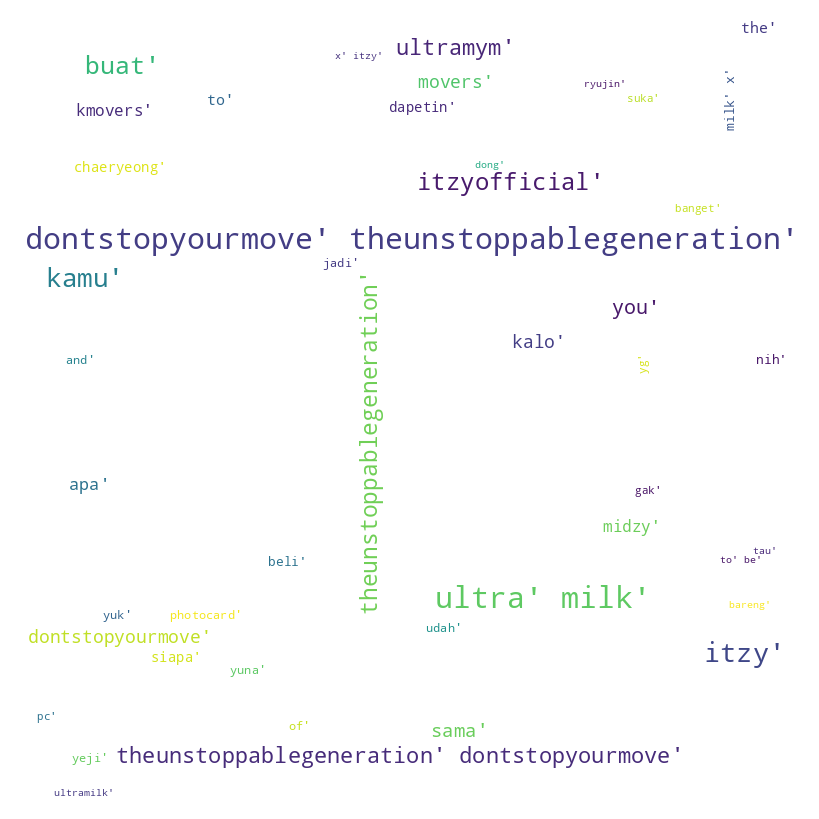

In [ ]:
## GENERATE WORD CLOUD

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

df = df_clean.text_token

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

#### Frequency Word Text

In [ ]:
from nltk.probability import FreqDist
fdist = FreqDist()

In [ ]:
for sentence in df_clean.text_token:
  #print(sentence)
  for word in sentence:
    #print(word)
    fdist[word] += 1

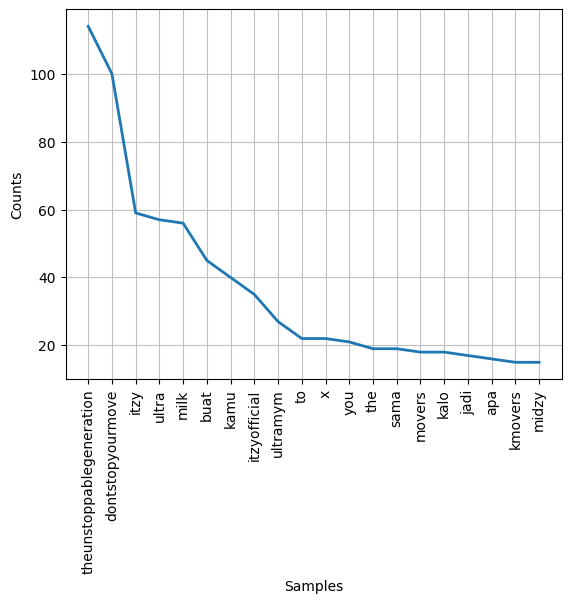

In [ ]:
fdist.plot(20)
plt.show()